In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
# Path to your dataset directory

data = pd.read_csv('D:/Documents/Thesis/Code/DataSet/english.csv')

In [4]:
# Split data into features (paths) and labels
x_data = data['image'].values
y_data = data['label'].values

# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [5]:
# Create an ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Define image dimensions
image_height = 128 
image_width = 128  

# Define batch size
batch_size = 32  # You can change this value

train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'path_column': x_train, 'label_column': y_train}),
    x_col='path_column',
    y_col='label_column',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'path_column': x_val, 'label_column': y_val}),
    x_col='path_column',
    y_col='label_column',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2728 validated image filenames belonging to 62 classes.
Found 682 validated image filenames belonging to 62 classes.


In [6]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(62, activation='softmax')
])

In [7]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
print(train_generator.class_indices.keys())


dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])


In [9]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=80,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)
model.save('optimize_trained_model')

Epoch 1/80
86/86 [==============================] - 216s 3s/step - loss: 4.2255 - accuracy: 0.0158 - val_loss: 4.1193 - val_accuracy: 0.0176
Epoch 2/80
86/86 [==============================] - 68s 786ms/step - loss: 4.0934 - accuracy: 0.0264 - val_loss: 4.0555 - val_accuracy: 0.0455
Epoch 3/80
86/86 [==============================] - 69s 801ms/step - loss: 4.0174 - accuracy: 0.0389 - val_loss: 3.8932 - val_accuracy: 0.0528
Epoch 4/80
86/86 [==============================] - 71s 832ms/step - loss: 3.9100 - accuracy: 0.0568 - val_loss: 3.7617 - val_accuracy: 0.0689
Epoch 5/80
86/86 [==============================] - 72s 840ms/step - loss: 3.8259 - accuracy: 0.0491 - val_loss: 3.7286 - val_accuracy: 0.0777
Epoch 6/80
86/86 [==============================] - 73s 846ms/step - loss: 3.7646 - accuracy: 0.0652 - val_loss: 3.6078 - val_accuracy: 0.1012
Epoch 7/80
86/86 [==============================] - 68s 794ms/step - loss: 3.7032 - accuracy: 0.0704 - val_loss: 3.5310 - val_accuracy: 0.1261
E

INFO:tensorflow:Assets written to: optimize_trained_model\assets


INFO:tensorflow:Assets written to: optimize_trained_model\assets


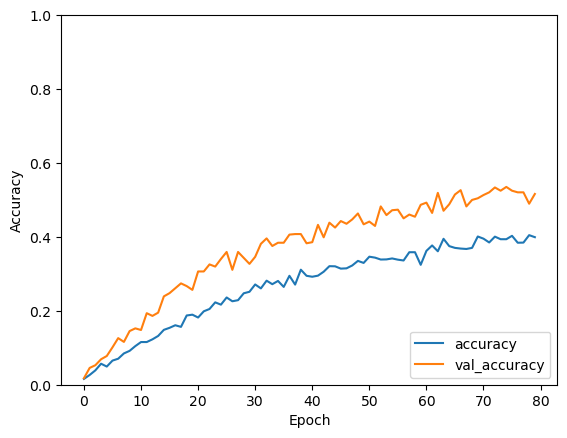

In [10]:
# Plot Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 208ms/step


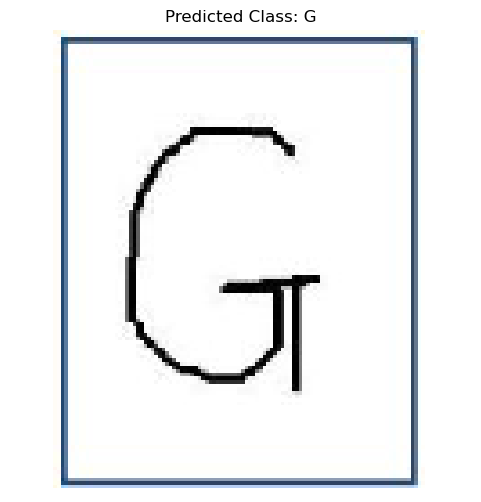

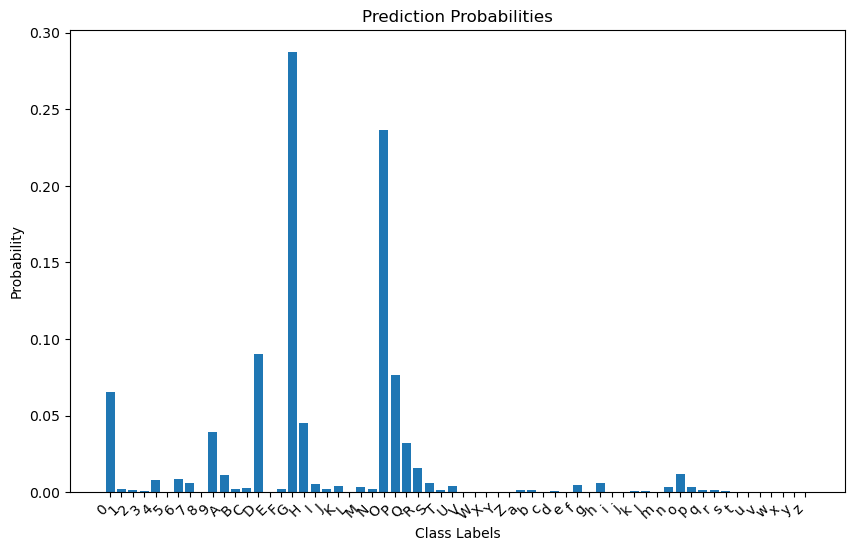

22/22 [==============================] - 11s 513ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.07      0.07        14
           1       0.05      0.09      0.07        11
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        14
           5       0.17      0.06      0.09        16
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        11
           A       0.00      0.00      0.00        16
           B       0.00      0.00      0.00         9
           C       0.00      0.00      0.00         9
           D       0.00      0.00      0.00        10
           E       0.00      0.00      0.00        15
           F       0.00      0.00      0.00        14
  

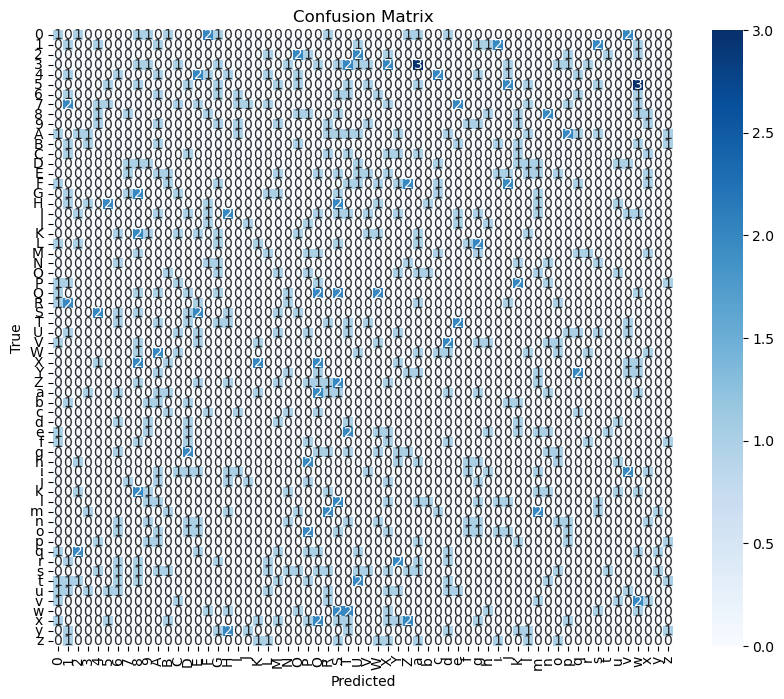

In [11]:
# Make Predictions (replace 'test_image_path' with the actual path to your test image)
test_image_path = 'rawData/g.jpg'  # Replace with the actual path to your test image
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(image_height, image_width))
test_image = tf.keras.preprocessing.image.img_to_array(test_image) / 255.0

# Handle transparent or black backgrounds
if test_image.shape[2] == 4:  # Image has an alpha channel (transparent)
    # Fill transparent regions with white color (you can adjust the color)
    test_image[test_image[:, :, 3] == 0] = [1, 1, 1, 1]
elif np.all(test_image <= 0.1):  # Image is mostly black
    # Fill black regions with white color
    test_image[test_image <= 0.1] = 1.0

test_image = np.expand_dims(test_image, axis=0)
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

# Display the test image and prediction
class_labels = list(train_generator.class_indices.keys())  # Get class labels

plt.figure(figsize=(6, 6))
plt.imshow(test_image[0])
plt.title(f"Predicted Class: {class_labels[predicted_class]}")
plt.axis('off')
plt.show()

# Plot the prediction probabilities
plt.figure(figsize=(10, 6))
plt.bar(class_labels, predictions[0])
plt.title("Prediction Probabilities")
plt.xlabel("Class Labels")
plt.ylabel("Probability")
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate predictions and true labels for validation data
validation_steps = len(validation_generator)
y_val_pred = model.predict(validation_generator, steps=validation_steps)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = validation_generator.classes

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification Report
print("Classification Report:")
print(classification_report(y_val_true, y_val_pred_classes, target_names=class_labels))

# Confusion Matrix
confusion_mat = confusion_matrix(y_val_true, y_val_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

1/1 [==============================] - 0s 28ms/step


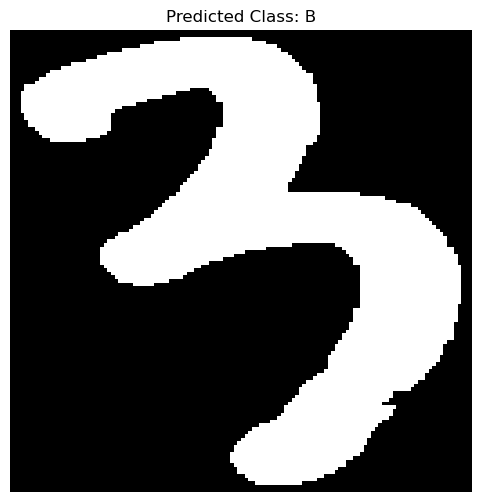

In [12]:
# Make Predictions (replace 'test_image_path' with the actual path to your test image)
test_image_path = 'rawData/3.png'  # Replace with the actual path to your test image
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(image_height, image_width))
test_image = tf.keras.preprocessing.image.img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

# Display the test image and prediction
class_labels = list(train_generator.class_indices.keys())  # Get class labels

plt.figure(figsize=(6, 6))
plt.imshow(test_image[0])
plt.title(f"Predicted Class: {class_labels[predicted_class]}")
plt.axis('off')
plt.show()
